In [39]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split

In [40]:
dataset = pd.read_csv('/content/Sentiment.csv')

In [41]:
dataset

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,13867,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,No candidate mentioned,...,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,NaN,2015-08-07 09:29:43 -0700,629690895479250944,Como,NaN
13867,13868,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,Mike Huckabee,...,yes,1,NaN,NaN,RT @georgehenryw: Who thought Huckabee exceede...,NaN,2015-08-07 09:25:02 -0700,629689719056568320,USA,NaN
13868,13869,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,Ted Cruz,...,yes,67,Positive\nNeutral,NaN,"RT @Lrihendry: #TedCruz As President, I will a...",NaN,2015-08-07 07:19:18 -0700,629658075784282112,NaN,NaN
13869,13870,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,...,yes,149,NaN,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,NaN,2015-08-07 09:54:04 -0700,629697023663546368,NaN,NaN


In [42]:
dataset = dataset[['text','sentiment']]

In [43]:
dataset

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


In [44]:
dataset = dataset[dataset['sentiment']!= 'Neutral']

In [45]:
dataset

,text,sentiment
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
5,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",Positive
6,RT @warriorwoman91: I liked her and was happy ...,Negative
...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


<Axes: xlabel='sentiment', ylabel='Count'>

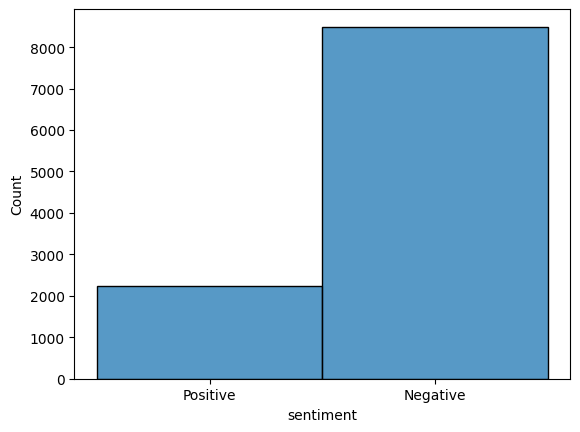

In [46]:
import seaborn as sns
sns.histplot(data=dataset, x="sentiment")

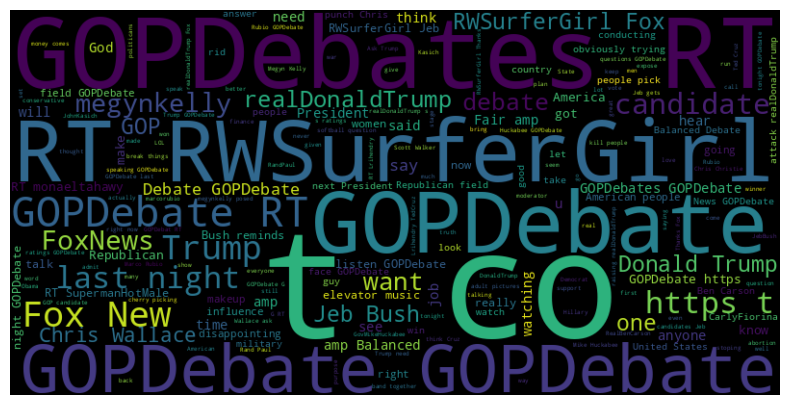

In [47]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all text data from the 'text' column
text = ' '.join(dataset['text'].astype(str))

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Data Preprocessing**

In [48]:
train,test = train_test_split(dataset,test_size=0.1)

In [49]:
train

,text,sentiment
10315,All this science talk is hot!!!! @BenCarson201...,Positive
4144,"RT @Braun23Austin: Enough #GOPDebate! 3,000 li...",Negative
2458,RT @Phil_Cosby_: Sooooo...do we want any of th...,Negative
10444,"RT @SupermanHotMale: Dear friends, it may seem...",Negative
3479,@realDonaldTrump @FoxNews so much fun watching...,Positive
...,...,...
4779,RT @DTCahill: FOX FIX IN: @FoxNews why no onli...,Negative
8805,RT @RWSurferGirl: It is very disappointing tha...,Negative
11832,RT @RWSurferGirl: The candidates don't have to...,Negative
12985,RT @IamMillTalk: And if they don't stop saying...,Negative


In [50]:
test

,text,sentiment
1191,RT @Sanddragger: .@FoxNews is having a hard ti...,Negative
6387,"Media, be it on the Left or Right, want to sha...",Negative
13636,"""You know how [Hillary Clinton] will come afte...",Negative
8566,RT @RWSurferGirl: Fox News is obviously trying...,Negative
4307,RT @joshrobin: Good point by @bobhardt on @Sen...,Positive
...,...,...
13219,"RT @SupermanHotMale: Dear Gov Walker, you have...",Negative
6043,RT @NASCARNAC: Funny to see so many calling to...,Negative
9712,RT @RWSurferGirl: Is it just me or does anyone...,Negative
3099,@BillHemmer &amp; @marthamaccallum were profes...,Negative


In [51]:
train['text'][9720]

'RT @RWSurferGirl: It is very disappointing that Fox News is not conducting a "Fair &amp; Balanced" Debate. 🇺🇸 #GOPDebate  #GOPDebates'

In [52]:
pattern = "(#\w+)|(RT\s@\w+:)|(http.*)|(@\w+)"

In [53]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [54]:
def Clean_text(data):
    tweets = []
    sentiments = []
    for index,row in data.iterrows():
        sentence = re.sub(pattern,'',row.text)
        words = [e.lower() for e in sentence.split()]
        words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
        words = ' '.join(words)
        tweets.append(words)
        sentiments.append(row.sentiment)
    return tweets,sentiments

In [55]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [56]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
train_tweets,train_sentiments = Clean_text(train)

In [58]:
final_data = {'tweets':train_tweets,'sentiments':train_sentiments}

In [59]:
processed_data = pd.DataFrame(final_data)

In [60]:
processed_data

,tweets,sentiments
0,science talk hot!!!!,Positive
1,"enough ! 3,000 light-year away, dying star kno...",Negative
2,sooooo...do want candidate next president?,Negative
3,"dear friends, may seem like fun i'm really mad...",Negative
4,much fun watching gop/fox circus implode.,Positive
...,...,...
9651,fox fix in: online winner viewer poll? 2012? a...,Negative
9652,"disappointing fox news conducting ""fair &amp; ...",Negative
9653,candidate attack fox stoping speaking. 🇺🇸 …,Negative
9654,"stop saying . affordable healthcare act, yo damn",Negative


In [61]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
processed_data['sentiments'] = labelencoder.fit_transform(processed_data['sentiments'])

In [62]:
processed_data

,tweets,sentiments
0,science talk hot!!!!,1
1,"enough ! 3,000 light-year away, dying star kno...",0
2,sooooo...do want candidate next president?,0
3,"dear friends, may seem like fun i'm really mad...",0
4,much fun watching gop/fox circus implode.,1
...,...,...
9651,fox fix in: online winner viewer poll? 2012? a...,0
9652,"disappointing fox news conducting ""fair &amp; ...",0
9653,candidate attack fox stoping speaking. 🇺🇸 …,0
9654,"stop saying . affordable healthcare act, yo damn",0


### **Converting words into vectors**

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1,3))
cv.fit(processed_data['tweets'])

CountVectorizer(ngram_range=(1, 3))

In [64]:
X_train = cv.transform(processed_data['tweets'])

In [65]:
print(X_train.shape)

(9656, 82139)


In [66]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [67]:
target = processed_data['sentiments'].values

In [68]:
target

array([1, 0, 0, ..., 0, 0, 0])

### **Sentiment Analysis**

In [69]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

In [70]:
classifier.fit(X_train.toarray(),target)

MultinomialNB()

In [71]:
test_tweets,test_sentiments = Clean_text(test)

In [72]:
data_test = {'tweets':test_tweets,'sentiments':test_sentiments}
final_test_data = pd.DataFrame(data_test)

In [73]:
X_test = cv.transform(final_test_data['tweets'])

In [74]:
X_test.shape

(1073, 82139)

In [75]:
y_pred = classifier.predict(X_test.toarray())

In [76]:
final_test_data['sentiments'] = labelencoder.fit_transform(final_test_data['sentiments'])

In [77]:
final_test_data

,tweets,sentiments
0,. hard time covering . put colleague bad spot.,0
1,"media, left right, want shape news way see it....",0
2,"""you know [hillary clinton] come you..."" ... m...",0
3,fox news obviously trying influence makeup rep...,0
4,good point rejection -- hiding political world...,1
...,...,...
1068,"dear gov walker, nothing brag about, fucked st...",0
1069,funny see many calling avoid watching i've say...,0
1070,anyone else want punch chris wallace face? 🇺🇸,0
1071,&amp; professional &amp; fair. &amp; neither.,0


In [78]:
actual_values = final_test_data['sentiments'].values

In [79]:
actual_values

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,actual_values))

0.8518173345759553


In [81]:
final_test_data

,tweets,sentiments
0,. hard time covering . put colleague bad spot.,0
1,"media, left right, want shape news way see it....",0
2,"""you know [hillary clinton] come you..."" ... m...",0
3,fox news obviously trying influence makeup rep...,0
4,good point rejection -- hiding political world...,1
...,...,...
1068,"dear gov walker, nothing brag about, fucked st...",0
1069,funny see many calling avoid watching i've say...,0
1070,anyone else want punch chris wallace face? 🇺🇸,0
1071,&amp; professional &amp; fair. &amp; neither.,0


In [89]:
X_test.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
classifier.predict(X_test.toarray()[[0]])

array([0])